## Kaggle比赛  -周程杨
### 什么是Kaggle？
Kaggle成立于2010年，是一个进行数据发掘和预测竞赛的在线平台。从公司的角度来讲，可以提供一些数据，进而提出一个实际需要解决的问题；从参赛者的角度来讲，他们将组队参与项目，针对其中一个问题提出解决方案，最终由公司选出的最佳方案可以获得5K-10K美金的奖金。
![](https://static.leiphone.com/uploads/new/article/740_740/201703/58c1167db8ad4.png?imageMogr2/format/jpg/quality/90)
### Kaggle竞赛模式
* 竟争激烈的的 “Featured”
* 平民化的 “Research”
* 初学者的  “Getting Started”  

就是通过出题方给予的训练集建立模型，再利用测试集算出结果用来评比。

### Kaggle竞赛流程
* 了解问题背景：对竞赛的背景进行了解
* 下载数据
* 分析数据：Explore Data Analysis
* 数据处理和特征工程：Data Process and FeatureEngineering
* 模型：Model Select
* 提交结果：Submission

### 一、 问题背景
![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/2.jpeg?imageView/2/w/700/q/100)
故事的背景是泰坦尼克号邮轮失事，我们要做的工作是利用游客的信息来预测游客存活的概率。  
这里输入是游客的身份信息，输出是游客存活的概率。

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

### 二、得到数据

In [42]:
#导入数据
data_train = pd.read_csv(r"train.csv")
data_test = pd.read_csv(r"test.csv")

### 三、 分析数据

In [43]:
passen = data_test.PassengerId.copy()  # 提交做准备
def submit(y_test,name): # 设置提交函数
    result = pd.DataFrame({'PassengerId': passen.values,'Survived': y_test})
    result.to_csv(r'output\My_'+name+'.csv',index = False)
print(data_test.info(),data_train.info())
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


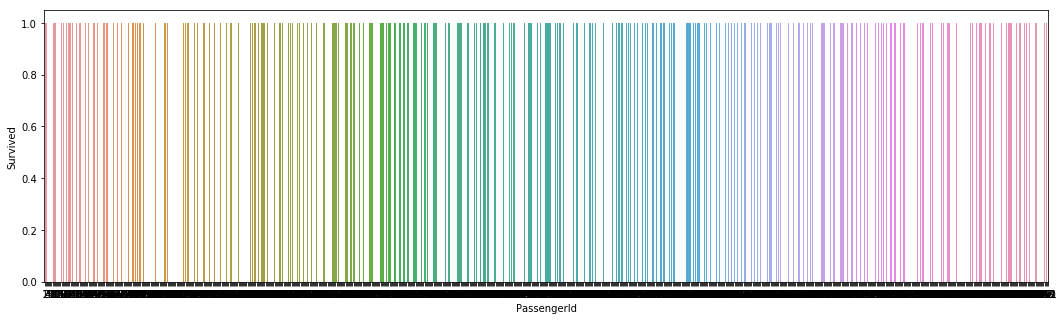

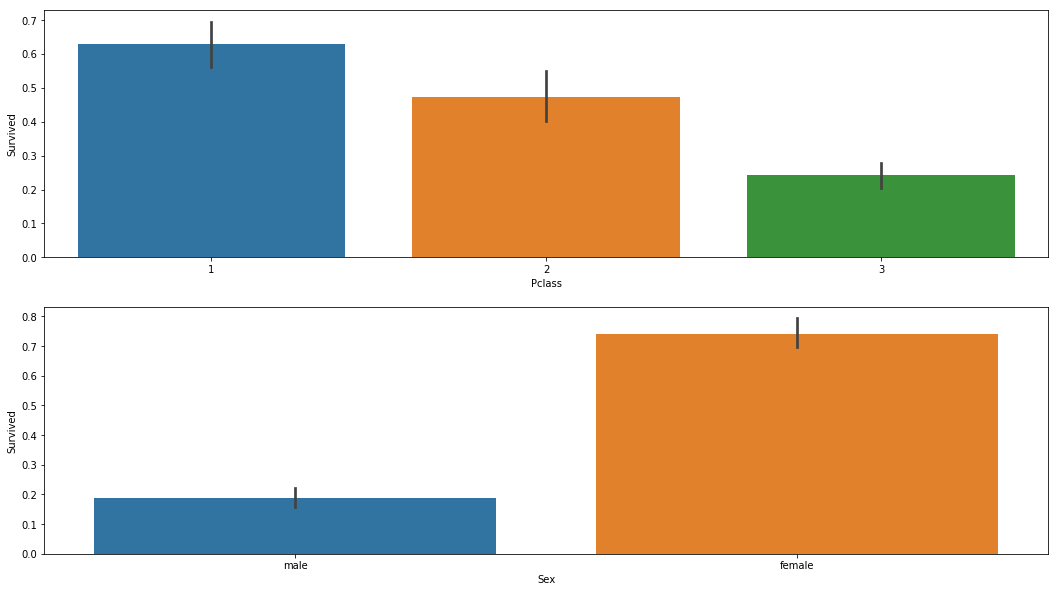

In [44]:
fig = plt.figure(figsize=(18,5))
sns.barplot(x = 'PassengerId',y ='Survived',data = data_train)
fig = plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
sns.barplot(x = 'Pclass',y ='Survived',data = data_train)
plt.subplot(2,1,2)
sns.barplot(x = 'Sex',y ='Survived',data = data_train)
plt.show()

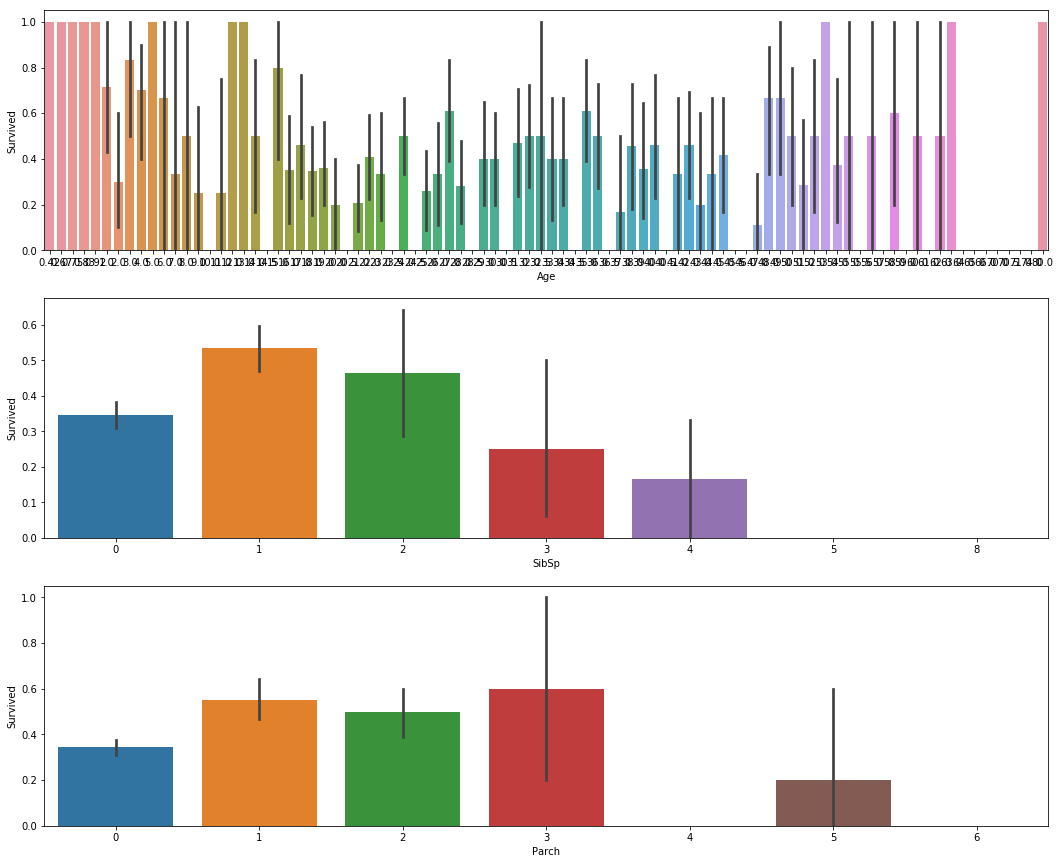

In [45]:
fig = plt.figure(figsize=(18,15))
plt.subplot(3,1,1)
sns.barplot(x = 'Age',y ='Survived',data = data_train[pd.notnull(data_train['Age'])])
plt.subplot(3,1,2)
sns.barplot(x = 'SibSp',y ='Survived',data = data_train)
plt.subplot(3,1,3)
sns.barplot(x = 'Parch',y ='Survived',data = data_train)
plt.show()

c:\users\mrfive1001\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


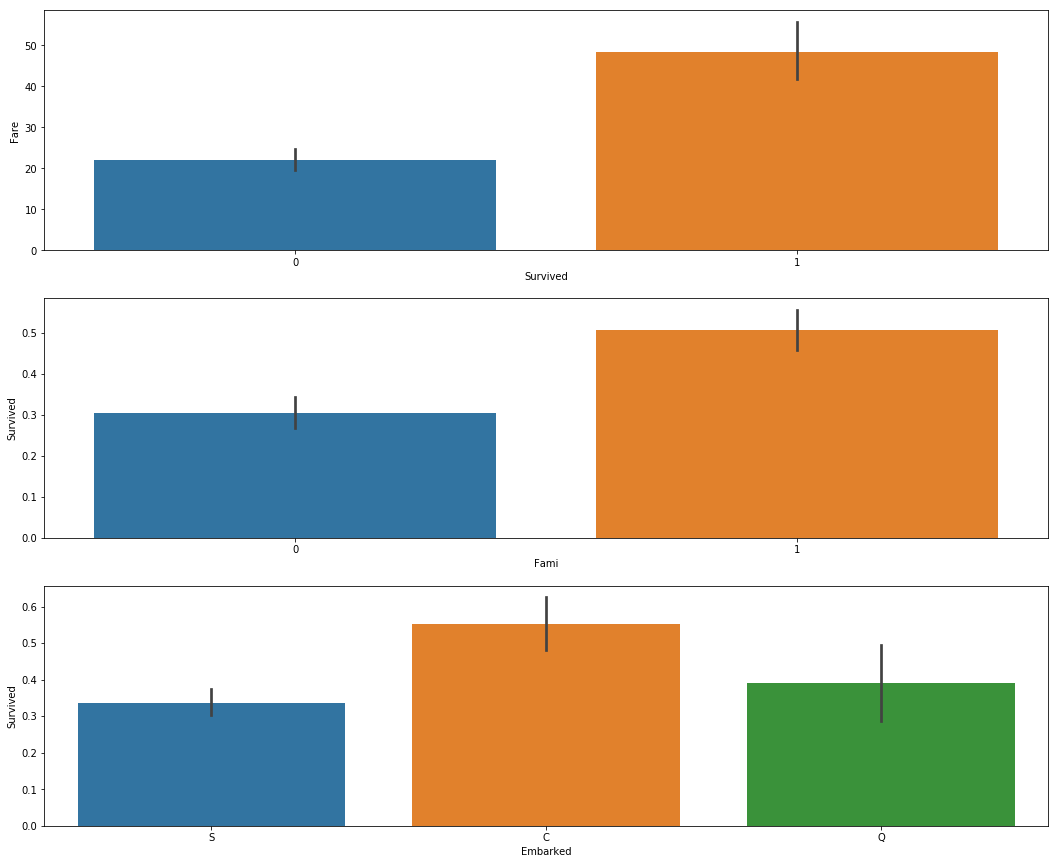

In [46]:
fig = plt.figure(figsize=(18,15))
plt.subplot(3,1,1)
sns.barplot(x = 'Survived',y ='Fare',data = data_train)
plt.subplot(3,1,2)
data_train['Fami'] = data_train['SibSp']+data_train['Parch']
preprocessing.binarize(data_train['Fami'],threshold=0.9,copy = False)
sns.barplot(x = 'Fami',y ='Survived',data = data_train)
data_train.drop('Fami',axis = 1,inplace = True)
plt.subplot(3,1,3)
sns.barplot(x = 'Embarked',y ='Survived',data = data_train[pd.notnull(data_train['Embarked'])])
plt.show()

c:\users\mrfive1001\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


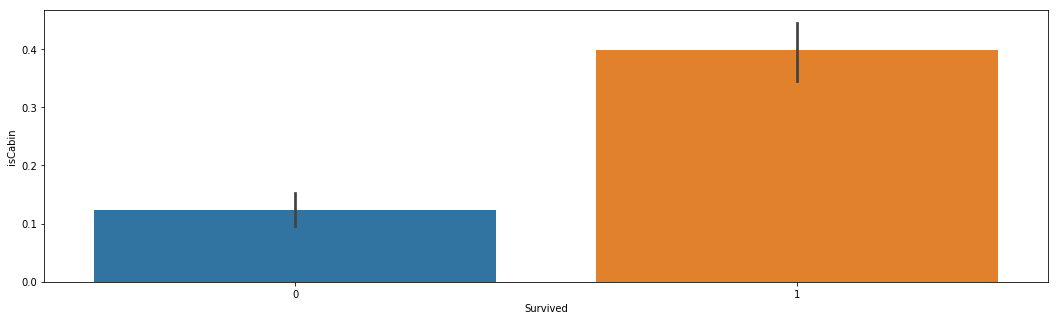

In [47]:
fig = plt.figure(figsize=(18,5))
data_train['isCabin'] = 0
data_train['isCabin'][pd.notnull(data_train['Cabin'])] = 1
sns.barplot(x = 'Survived',y ='isCabin',data = data_train)
data_train.drop('isCabin',axis=1,inplace=True)
plt.show()

### 四、数据处理和特征工程
* 去除无效特征
* 缺失值计算  
* 对定量特征二值化
* 对定性特征哑编码
* 无量纲化（标准化，缩放）   
* 选择特征  

#### 1、去除'PassengerId','Name','Ticket'这三个无意义特征。

In [48]:
data_test =  data_test.drop(['PassengerId','Name','Ticket'],axis = 1)
data_train = data_train.drop(['PassengerId','Name','Ticket'],axis = 1)
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
5,3,male,14.0,0,0,9.2250,NaN,S
6,3,female,30.0,0,0,7.6292,NaN,Q
7,2,male,26.0,1,1,29.0000,NaN,S
8,3,female,18.0,0,0,7.2292,NaN,C
9,3,male,21.0,2,0,24.1500,NaN,S


#### 2、缺失值处理  
有缺失值的特征有Cabin，Fare，Age和Embarked。  
Cabin:有缺失值填补0，无缺失值填补1  
Fare:缺失值较少我们用平均数来代替空值  
Age：这个因素就比较复杂，缺失的不多，可以利用随机补全利用[mean-std,mean+std]  
Embarked:缺失值较少,将缺失值丢掉  

In [49]:
def solve_nan(data):
    data['Cabin'][pd.notnull(data['Cabin'])] = 1
    data['Cabin'][pd.isnull(data['Cabin'])] = 0
    preprocessing.Imputer(strategy='mean',copy=False).fit_transform(data['Fare'].reshape(-1,1))  #输入一维的参数时要注意
    me = data.Age.mean()
    st = data.Age.std()
    si = data.Age.isnull().sum()
    rand1 = np.random.randint(me-st,me+st,size=si)
    data.Age[data.Age.isnull()] = rand1
    data.dropna(how = 'any',inplace= True)
    return data
data_test = solve_nan(data_test)
data_train = solve_nan(data_train)
data_train

c:\users\mrfive1001\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mrfive1001\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mrfive1001\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
c:\users\mrfive1001\appd

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S
5,0,3,male,26.0,0,0,8.4583,0,Q
6,0,1,male,54.0,0,0,51.8625,1,S
7,0,3,male,2.0,3,1,21.0750,0,S
8,1,3,female,27.0,0,2,11.1333,0,S
9,1,2,female,14.0,1,0,30.0708,0,C


#### 3、对定量特征二值化  
这里的没有需要二值化的定量特征，定量特征指的是到达某个阈值表示为1，未到达阈值为0.粗略来说'Sex'列进行的也是特征二值化，但是是定性特征。  
#### 4、定性特征哑编码  
某些机器学习算法和模型只能接受定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。需要哑编码的是'Pclass','Embarked'。

In [50]:
def get_dummy(data):
    data = pd.merge(data,pd.get_dummies(data['Embarked'],prefix = 'Embarked'),left_index=True,right_index=True)
    data = pd.merge(data,pd.get_dummies(data['Pclass'],prefix = 'Pclass'),left_index=True,right_index=True)
    data['Sex'] = preprocessing.LabelBinarizer().fit_transform(data['Sex'].reshape((-1,1)))
    data = data.drop(['Pclass','Embarked'],axis = 1)
    return data
data_train = get_dummy(data_train)
data_test = get_dummy(data_test)

c:\users\mrfive1001\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [51]:
def fam(par):
    x,y = par
    return 1 if (x+y) >= 1 else 0
data_train['Family'] = data_train[['SibSp','Parch']].apply(fam,axis = 1)
data_train.drop(['SibSp','Parch'],axis = 1,inplace=True)
data_test['Family'] = data_test[['SibSp','Parch']].apply(fam,axis = 1)
data_test.drop(['SibSp','Parch'],axis = 1,inplace= True)
data_test

,Sex,Age,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,1,34.5,7.8292,0,0,1,0,0,0,1,0
1,0,47.0,7.0000,0,0,0,1,0,0,1,1
2,1,62.0,9.6875,0,0,1,0,0,1,0,0
3,1,27.0,8.6625,0,0,0,1,0,0,1,0
4,0,22.0,12.2875,0,0,0,1,0,0,1,1
5,1,14.0,9.2250,0,0,0,1,0,0,1,0
6,0,30.0,7.6292,0,0,1,0,0,0,1,0
7,1,26.0,29.0000,0,0,0,1,0,1,0,1
8,0,18.0,7.2292,0,1,0,0,0,0,1,0
9,1,21.0,24.1500,0,0,0,1,0,0,1,1


#### 5、无量纲化  
标准化：是指按照标准差、平均值来进行缩放   
区间缩放：按照两个值进行缩放，可以是绝对值或者最大最小值   
简单来说，标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下。归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”。

In [52]:
def type_change(data):
    data.iloc[:,-8:] = data.iloc[:,-8:].astype(np.int64)
    data['Sex'] = data['Sex'].astype(np.int64)
    return data
data_train = type_change(data_train)
data_test = type_change(data_test)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null int64
Embarked_C    418 non-null int64
Embarked_Q    418 non-null int64
Embarked_S    418 non-null int64
Pclass_1      418 non-null int64
Pclass_2      418 non-null int64
Pclass_3      418 non-null int64
Family        418 non-null int64
dtypes: float64(2), int64(9)
memory usage: 59.2 KB


In [53]:
data_train[['Age','Fare']] = preprocessing.MinMaxScaler().fit_transform(data_train[['Age','Fare']])
data_test[['Age','Fare']] = preprocessing.MinMaxScaler().fit_transform(data_test[['Age','Fare']])
data_train.head()

,Survived,Sex,Age,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0,1,0.271174,0.014151,0,0,0,1,0,0,1,1
1,1,0,0.472229,0.139136,1,1,0,0,1,0,0,1
2,1,0,0.321438,0.015469,0,0,0,1,0,0,1,0
3,1,0,0.434531,0.103644,1,0,0,1,1,0,0,1
4,0,1,0.434531,0.015713,0,0,0,1,0,0,1,0


#### 6、特征选择
当数据预处理完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从特征是否发散和特征与目标的相关性来进行选择。  
Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。  
Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。  
Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。

In [54]:
y_train = (data_train.loc[:,'Survived']).values.copy()
x_train = data_train.iloc[:,1:].values.copy()
x_test = data_test.values.copy()
x_train

array([[ 1.        ,  0.27117366,  0.01415106, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.4722292 ,  0.13913574, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.32143755,  0.01546857, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 0.        ,  0.48479517,  0.04577135, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.32143755,  0.0585561 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.39683338,  0.01512699, ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
# 递归特征消除法 包装法
from sklearn import feature_selection
from sklearn import linear_model
feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select=4).fit_transform(x_train,y_train)

array([[ 1.        ,  0.27117366,  0.        ,  0.        ],
       [ 0.        ,  0.4722292 ,  1.        ,  0.        ],
       [ 0.        ,  0.32143755,  0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.48479517,  0.        ,  0.        ],
       [ 1.        ,  0.32143755,  1.        ,  0.        ],
       [ 1.        ,  0.39683338,  0.        ,  0.        ]])

In [56]:
#带L1惩罚项的逻辑回归作为基模型的特征选择 嵌入法
select = feature_selection.SelectFromModel(linear_model.LogisticRegression(penalty="l1", C=0.1))
select.fit(x_train,y_train)
# x_train = select.transform(x_train)
# x_test = select.transform(x_test)

SelectFromModel(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        prefit=False, threshold=None)

### 五、模型
#### 1、 模型选择
基模型：  
* SVM
* Logistic Regression
* KNN
* Linear Regression  
* Decision Tree

集成算法:
* Bagging  ![算法原理](http://images2015.cnblogs.com/blog/1042406/201612/1042406-20161204200000787-1988863729.png)  
随机森林是bagging中的最著名的一种方法：特殊之处进行特征的随机选择 ![随机森林](http://img.blog.csdn.net/20160705210147565)
* Boosting ![算法框图](http://images2015.cnblogs.com/blog/1042406/201612/1042406-20161204194331365-2142863547.png)
代表算法有Adaboost、GBDT
![示例](http://img.blog.csdn.net/20140517203928328)  
XGBOOST：在最近Kaggle比赛中大放异彩

#### 2、 模型调参
* 交叉验证：  
    简单交叉验证（3：7）  
    K折交叉验证  ![wewe](http://upload-images.jianshu.io/upload_images/197419-b1d7b5303c53d8ba.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240) 
* 调节参数

In [57]:
def piline(clf,name):
    clf.fit(x_train,y_train)
    y_test = clf.predict(x_test)
    print(name,'训练准确率为:',clf.score(x_train,y_train))
    print(name,'验证准确率为:',np.mean(model_selection.cross_val_score(clf,x_train,y_train,cv =10)))
    submit(y_test,name)

In [58]:
# 逻辑回归
from sklearn import model_selection
from sklearn import linear_model
logi = linear_model.LogisticRegression()
piline(logi,'LogisticRegression')

LogisticRegression 训练准确率为: 0.802024746907
LogisticRegression 验证准确率为: 0.803166496425


In [59]:
# SVM支持向量机
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train,y_train)
piline(svc,'SVM')

SVM 训练准确率为: 0.786276715411
SVM 验证准确率为: 0.786248723187


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
piline(knn,'KNN')

KNN 训练准确率为: 0.842519685039
KNN 验证准确率为: 0.77277834525


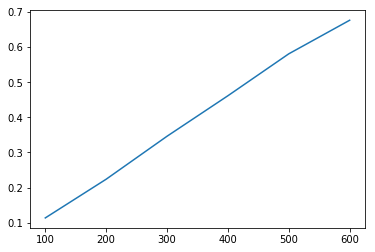

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
par = {'n_estimators':[100,200,300,400,500,600]}
random_forest = GridSearchCV(RandomForestClassifier(),par,cv=10)
random_forest.fit(x_train,y_train)
fig = plt.figure()
plt.plot(par['n_estimators'],random_forest.cv_results_['mean_fit_time'])
plt.show()

In [62]:
random_forest.cv_results_

{'mean_fit_time': array([ 0.11390972,  0.22399313,  0.34621432,  0.46139927,  0.58062432,
         0.67611265]),
 'mean_score_time': array([ 0.00661459,  0.01303844,  0.01996889,  0.02578249,  0.03358505,
         0.03880086]),
 'mean_test_score': array([ 0.81664792,  0.81214848,  0.80989876,  0.80764904,  0.80427447,
         0.80652418]),
 'mean_train_score': array([ 0.9916264 ,  0.99175125,  0.99175125,  0.99175125,  0.99175125,
         0.99175125]),
 'param_n_estimators': masked_array(data = [100 200 300 400 500 600],
              mask = [False False False False False False],
        fill_value = ?),
 'params': ({'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300},
  {'n_estimators': 400},
  {'n_estimators': 500},
  {'n_estimators': 600}),
 'rank_test_score': array([1, 2, 3, 4, 6, 5]),
 'split0_test_score': array([ 0.76404494,  0.76404494,  0.76404494,  0.76404494,  0.75280899,
         0.74157303]),
 'split0_train_score': array([ 0.99125,  0.99125,  0.99125,  

In [63]:
print(random_forest.best_estimator_)
print(random_forest.cv_results_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
{'split2_train_score': array([ 0.99625,  0.99625,  0.99625,  0.99625,  0.99625,  0.99625]), 'std_fit_time': array([ 0.00279581,  0.00376772,  0.00662961,  0.02058718,  0.02345377,
        0.01294014]), 'split8_test_score': array([ 0.84269663,  0.85393258,  0.85393258,  0.84269663,  0.85393258,
        0.85393258]), 'std_train_score': array([ 0.00201744,  0.00186966,  0.00186966,  0.00186966,  0.00186966,
        0.00186966]), 'split3_train_score': array([ 0.99125,  0.99125,  0.99125,  0.99125,  0.99125,  0.99125]), 'params': ({'n_estimators': 100}, {'n_estimators': 200}, {'n_estimators': 300}, {'n_estimators'

In [64]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [65]:
model_xgb = xgb.XGBRegressor(n_estimators=300, max_depth=2, learning_rate=0.13) #the params were tuned using xgb.cv
model_xgb.fit(x_train, y_train)
y_pre = model_xgb.predict(x_test)
y_pre[y_pre<0.5] = 0
y_pre[y_pre>=0.5] = 1
y_pre = np.array(y_pre,dtype = 'int32')
submit(y_pre,'xgboost')

In [72]:
# 将数据存下来
import pickle
with open('mydata.pkl','wb') as f:
    pickle.dump((x_train,y_train,x_test),f)

In [92]:
with open(r'ypre.pkl', 'rb') as f:
    y = pickle.load(f)
y[y>=0.5] = 1
y[y<0.5] = 0
ynew = []
for j in y:
    ynew.append(int(j[1]))
ynew = np.array(ynew)

In [93]:
submit(ynew,'deep1')
#submit(y[:,1],'deep2')

### 六、提交


### 总结：
对Kaggle进行了简单的了解，并以泰坦尼克号问题为例介绍了机器学习处理实际问题的大致流程。  
![](http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/process.png?imageView/2/w/700/q/100)
* 了解问题背景：对竞赛的背景进行了解
* 下载数据
* 分析数据：Explore Data Analysis
* 数据处理和特征工程：Data Process and FeatureEngineering
* 模型：Model Select
* 提交结果：Submission
使用scikit_learn库的流程![](http://img.blog.csdn.net/20160930051801241?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQv/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)